# Tabular RL maze examples

Lets start with preliminaruies


In [12]:
## Reinforcement learning in 1d maze
import numpy as np
import matplotlib.pyplot as plt

def tau(s,a):
    if s==0 or s==4:  return(s)
    else:      return(s+a)
def rho(s,a):
    return(s==1 and a==-1)+2*(s==3 and a==1)    
def calc_policy(Q):
    policy=np.zeros(5)
    for s in range(0,5):
        action_idx=np.argmax(Q[s,:])
        policy[s]=2*action_idx-1
        policy[0]=policy[4]=0
    return policy.astype(int)
def idx(a):
    return(int((a+1)/2))
gamma=0.5;

## Analytic solution



In [4]:
print('--> Analytic solution for optimal policy')

# Defining reward vector R
i=0; R=np.zeros(10)
for s in range(0,5):
    for a in range(-1,2,2):       
        R[i]=rho(s,a)
        i += 1
# Defining transition matrix
T=np.zeros([10,10]);
T[0,0]=1; T[1,1]=1; T[2,0]=1; T[3,5]=1; T[4,2]=1
T[5,7]=1; T[6,5]=1; T[7,9]=1; T[8,8]=1; T[9,9]=1

# Calculate Q-function
Q=np.linalg.inv(np.eye(10)-gamma*T) @ np.transpose(R)
Q=np.reshape(Q,[5,2])

policy=calc_policy(Q)
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
Qana=Q
print(R)

--> Analytic solution for optimal policy
Q values: 
 [[ 0.   1.   0.5  0.5  0. ]
 [ 0.   0.5  1.   2.   0. ]]
policy: 
 [ 0 -1  1  1  0]
[ 0.  0.  1.  0.  0.  0.  0.  2.  0.  0.]


## Dynamic Programing

In [84]:
print('\n--> Dynamic Programing')

Q=np.zeros([5,2])
for iter in range(3):
    for s in range(0,5): 
        for a in range(-1,2,2):
            act = np.int(policy[tau(s,a)])
            Q[s,idx(a)]=rho(s,a)+gamma*Q[tau(s,a),idx(act)]

policy=calc_policy(Q); 
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))


--> Dynamic Programing
Q values: 
 [[ 0.   1.   0.5  0.5  0. ]
 [ 0.   0.5  1.   2.   0. ]]
policy: 
 [ 0 -1  1  1  0]


## Policy iteration

In [85]:
print('\n--> Policy iteration')

Q=np.zeros([5,2])
policy=calc_policy(Q)
for iter in range(3):
    for s in range(0,5): 
        for a in range(-1,2,2):
            act = np.int(policy[tau(s,a)])
            Q[s,idx(a)]=rho(s,a)+gamma*Q[tau(s,a),idx(act)]
    policy=calc_policy(Q)
    
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))


--> Policy iteration
Q values: 
 [[ 0.   1.   0.5  0.5  0. ]
 [ 0.   0.5  1.   2.   0. ]]
policy: 
 [ 0 -1  1  1  0]


## Q-iteration

In [86]:
print('\n--> Q-iteration')

Q_new=np.zeros([5,2])
Q=np.zeros([5,2])
policy = np.zeros(5)
for iter in range(2):
    for s in range(0,5): 
        for a in range(-1,2,2):
            maxValue = np.maximum(Q[tau(s,a),0],Q[tau(s,a),1])
            Q_new[s,idx(a)]=rho(s,a)+gamma*maxValue
    Q=np.copy(Q_new)

policy=calc_policy(Q)
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))


--> Q-iteration
Q values: 
 [[ 0.   1.   0.5  0.   0. ]
 [ 0.   0.   1.   2.   0. ]]
policy: 
 [ 0 -1  1  1  0]


## SARSA


--> SARSA
Q values: 
 [[ 0.   1.   0.5  0.5  0. ]
 [ 0.   0.5  1.   2.   0. ]]
policy: 
 [ 0 -1  1  1  0]


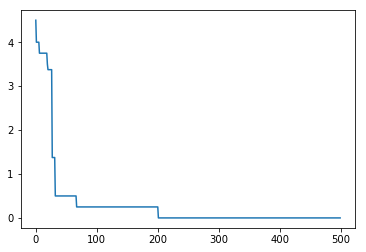

In [13]:
print('\n--> SARSA')

Q=np.zeros([5,2])
error = []
alpha=1;
for trial in range(500):
    policy=calc_policy(Q)
    s=2
    for t in range(0,5):
        a=policy[s]
        if np.random.rand()<0.1: a=-a #epsilon greedy
        a2=idx(policy[tau(s,a)])
        Q[s,idx(a)]=Q[s,idx(a)]+alpha*(rho(s,a)+gamma*Q[tau(s,a),a2]-Q[s,idx(a)])
        s=tau(s,a)
    error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.figure(); plt.plot(error); plt.show()

## Q-Learning


--> Q-Learning:
Q values: 
 [[ 0.          1.          0.5         0.5         0.        ]
 [ 0.          0.49999932  1.          2.          0.        ]]
policy: 
 [ 0 -1  1  1  0]


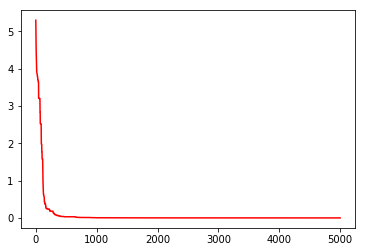

In [88]:
print('\n--> Q-Learning:')

Q=np.zeros([5,2])
alpha=0.2
error = []
for trial in range(5000):
    policy=calc_policy(Q)
    s=2
    for t in range(0,5):
        a=policy[s]
        if np.random.rand()<0.1: a=-a #epsilon greedy
        Q[s,idx(a)]=Q[s,idx(a)]+alpha*(rho(s,a)+gamma*np.maximum(Q[tau(s,a),0],Q[tau(s,a),1])-Q[s,idx(a)])
        s=tau(s,a)
    error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.plot(error,'r'); plt.show()

##  TD(lambda) for Q-Learning


--> TD(lambda) for Q-Learning:
[ 0.    0.    0.05  1.    0.  ]
Q values: 
 [[ 0.    1.    0.5   0.5   0.  ]
 [ 0.    0.25  1.    2.    0.  ]]
policy: 
 [ 0 -1  1  1  0]


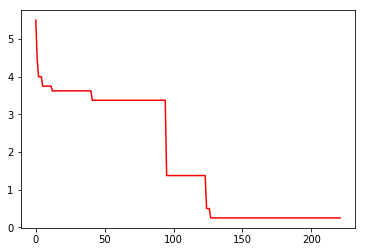

In [89]:
print('\n--> TD(lambda) for Q-Learning:')

Q=np.zeros([5,2])
alpha=1
lam=0.1
error = []

for trial in range(100):
    s=2; eligibility=np.zeros(5);
    for t in range(0,5):
        if s==0 or s==4: break
        eligibility*=gamma*lam
        eligibility[s]=1
        action_idx=np.argmax(Q[s,:])
        a=2*action_idx-1
        if np.random.rand()<0.1: a=-a #epsilon greedy

        for x in range(1,4):
           Q[x,idx(a)]=Q[x,idx(a)]+alpha*(rho(x,a)+gamma*np.maximum(Q[tau(x,a),0],Q[tau(x,a),1])-Q[x,idx(a)])*eligibility[x]
        s=tau(s,a)
        error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 
print(eligibility)
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.plot(error,'r'); plt.show()